In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DL lab/RT_IOT2022.csv')
df.head()
df.shape

(123117, 85)

In [4]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

print(categorical_columns)


Index(['proto', 'service', 'Attack_type'], dtype='object')


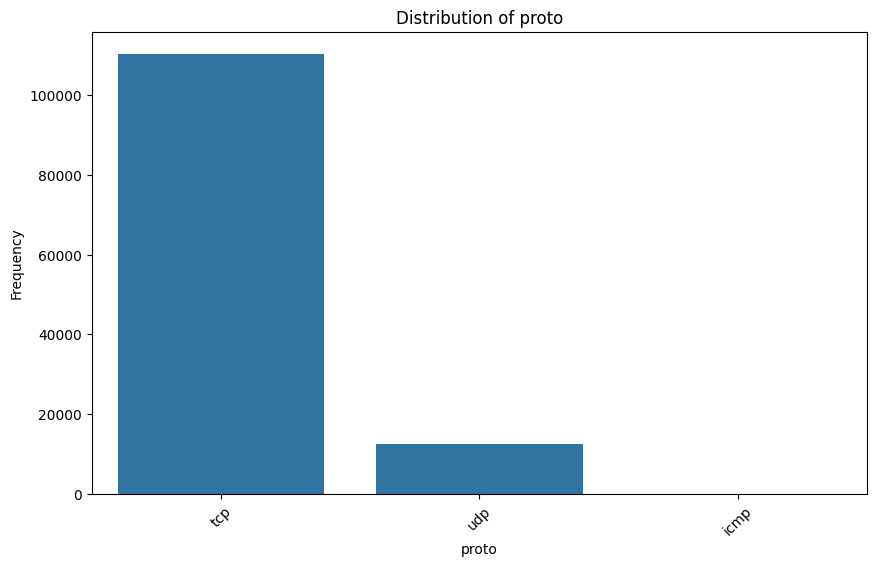

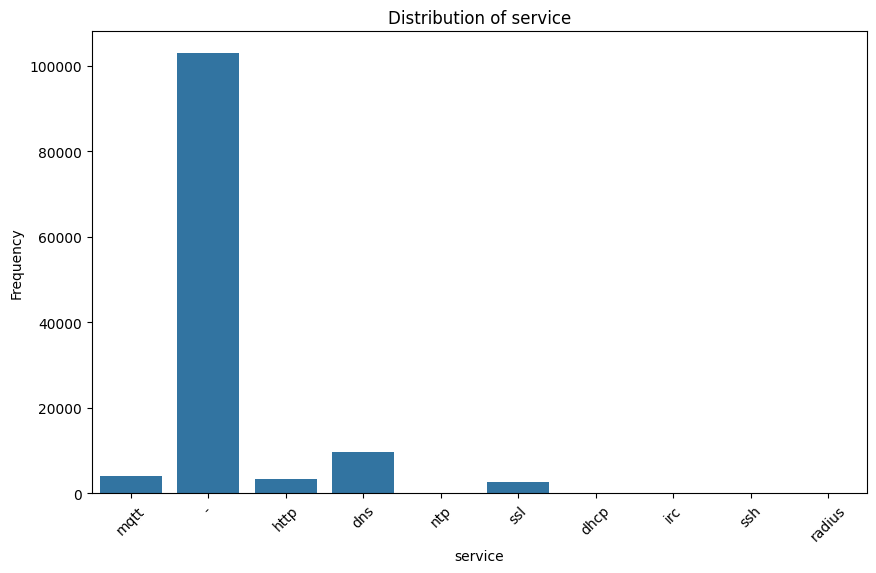

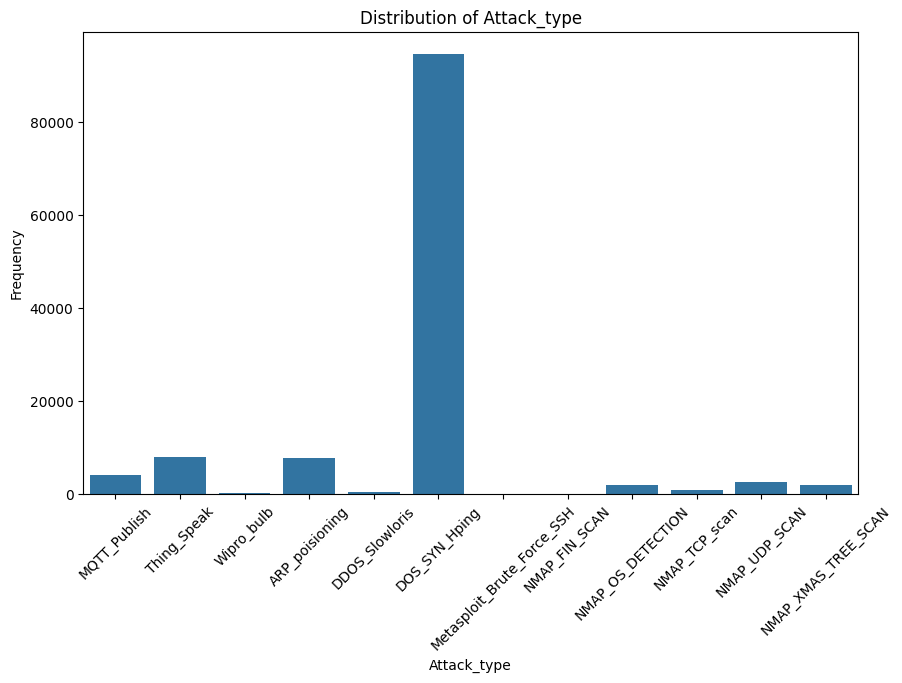

In [7]:
categories = ['proto', 'service', 'Attack_type']
for feature in categories:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

In [12]:


X = df[['proto', 'service']]
Y= df['Attack_type']



In [13]:
le = LabelEncoder()
X['proto'] = le.fit_transform(X['proto'])
X['service'] = le.fit_transform(X['service'])
X['proto'] = X['proto'].astype(int)
X['service'] = X['service'].astype(int)

<ipython-input-13-43066e531ff9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['proto'] = le.fit_transform(X['proto'])
<ipython-input-13-43066e531ff9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['service'] = le.fit_transform(X['service'])
<ipython-input-13-43066e531ff9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [14]:
y = le.fit_transform(Y)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [22]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [16]:
num_classes = len(set(y_train))
model = Sequential([
  Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),

  Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [19]:
from keras.callbacks import ModelCheckpoint

model_checkpoint_callback = ModelCheckpoint(
    filepath='best_model.keras',monitor='val_accuracy', save_best_only=True, mode='max', verbose=1
)


model.fit(X_train, y_train,epochs=20,batch_size=32,validation_split=0.2,callbacks=[model_checkpoint_callback])


Epoch 1/20
2305/2309 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8899 - loss: 0.3794
Epoch 1: val_accuracy improved from -inf to 0.89945, saving model to best_model.keras
2309/2309 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8899 - loss: 0.3794 - val_accuracy: 0.8994 - val_loss: 0.3395
Epoch 2/20
2303/2309 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9003 - loss: 0.3429
Epoch 2: val_accuracy improved from 0.89945 to 0.90031, saving model to best_model.keras
2309/2309 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9003 - loss: 0.3429 - val_accuracy: 0.9003 - val_loss: 0.3449
Epoch 3/20
2300/2309 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9015 - loss: 0.3436
Epoch 3: val_accuracy did not improve from 0.90031
2309/2309 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9015 - loss: 0.3436 - val_accuracy: 0.9003 - val_loss: 0.3383
Epoch 4/20
2283/2309 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9027 - loss: 0.3373
Epoch 4: val_accuracy did not improve from 0.90031
2309/2309 ━━━

962/962 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


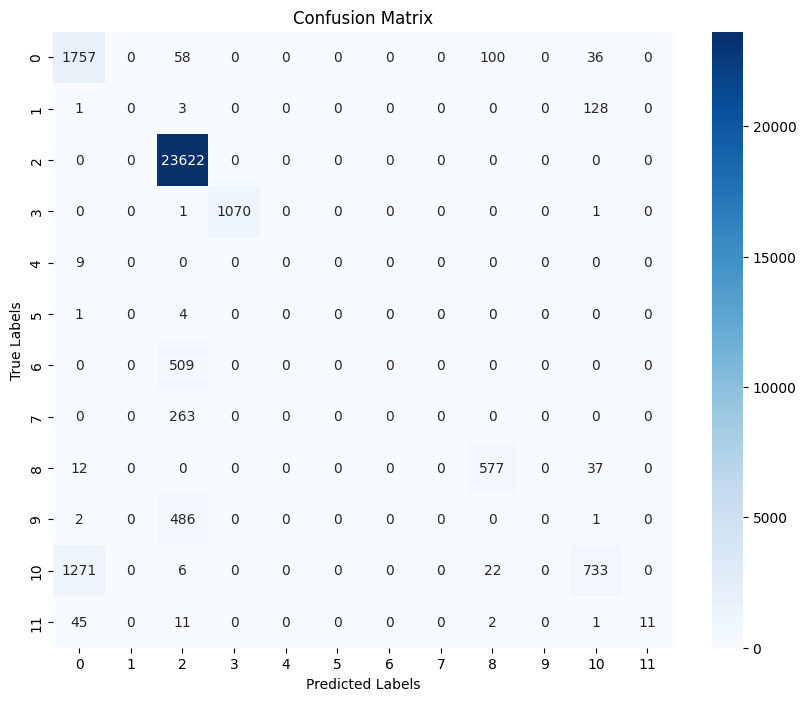

In [20]:


y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [21]:

accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)


Accuracy: 0.9022092267706303
